In [1]:
from os.path import dirname, join as pjoin
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

mat_contents = sio.loadmat("data.mat")

The first 15 subjects are from Taylor et al 2014, the next 10 are the rotating condition from Bond et al 2015, next 10 are from fixed landmarks from bond et al 2015, next ten are Brudner et al 2016, and last ten are unpublished.

In [2]:
mat_contents

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Mon Nov 27 20:46:03 2017',
 '__version__': '1.0',
 '__globals__': [],
 'data': array([[(array([[0, 0, 0, ..., 0, 0, 0],
                [0, 0, 0, ..., 0, 0, 0],
                [0, 0, 0, ..., 0, 0, 0],
                ...,
                [0, 0, 0, ..., 0, 0, 0],
                [0, 0, 0, ..., 0, 0, 0],
                [0, 0, 0, ..., 0, 0, 0]], dtype=int16), array([[ 6.09821195, -2.85402497,  1.48145717, ..., -0.49821161,
                  1.23387217, -0.17849095],
                [ 1.88067824, -1.04162668,  1.03535319, ...,  7.52382044,
                 14.33280283,  1.94148639],
                [-0.51928288,  0.3472429 ,  0.6902772 , ..., -5.49232456,
                  2.45753815,  7.28595913],
                ...,
                [-2.5791475 ,  0.51616423, -3.97938245, ..., 14.71756657,
                 14.72548276, 21.42958369],
                [ 0.3430844 ,  2.08256528,  3.78056853, ..., 13.28018469,
             

In [3]:
rot = mat_contents["data"]["rotation"][0][0]
target_error = mat_contents["data"]["target_error"][0][0]
hand_angle = mat_contents["data"]["hand_angle"][0][0]
explicit = mat_contents["data"]["explicit"][0][0]
implicit = mat_contents["data"]["implicit"][0][0]
rt = mat_contents["data"]["rt"][0][0]
mt = mat_contents["data"]["rt"][0][0]

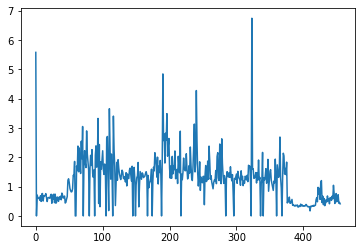

In [63]:
plt.plot(rt[0])

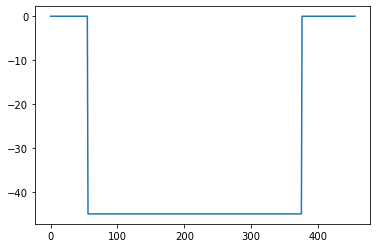

In [23]:
plt.plot(rot[1])

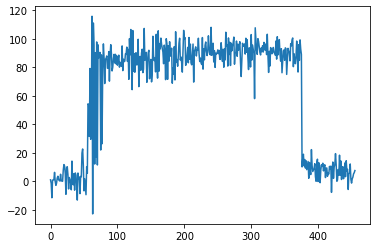

In [104]:
plt.plot(target_error[6])

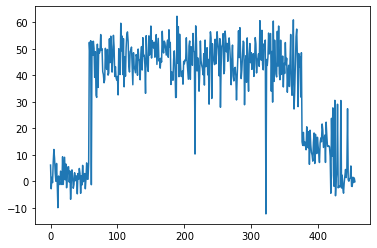

In [85]:
plt.plot(hand_angle[0])

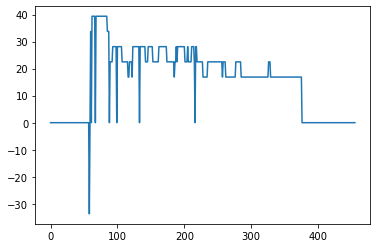

In [87]:
plt.plot(explicit[13])

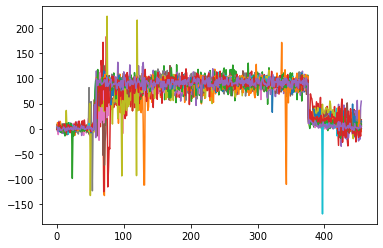

In [125]:
for i in range(15):
    plt.plot(target_error[i])

(-60.0, 45.0)

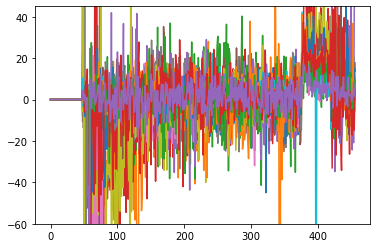

In [129]:
for i in range(15):
    plt.plot(np.nan_to_num(implicit[i])+np.nan_to_num(explicit[i])+rot[i])

plt.ylim(-60, 45)

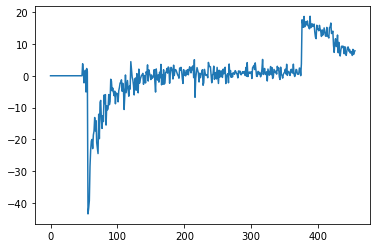

In [4]:
plt.plot(np.mean(np.nan_to_num(implicit)+np.nan_to_num(explicit)+rot, axis = 0))

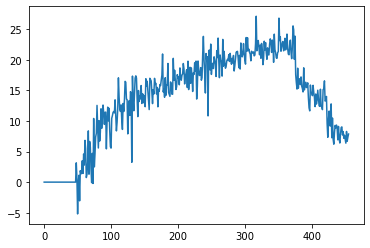

In [133]:
plt.plot(np.mean(np.nan_to_num(implicit), axis = 0))

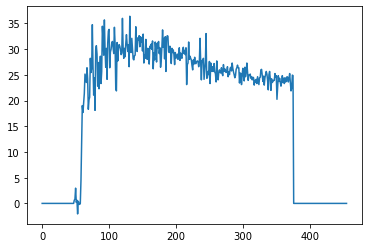

In [134]:
plt.plot(np.mean(np.nan_to_num(explicit), axis = 0))

In [257]:
error = np.nan_to_num(implicit)+np.nan_to_num(explicit)+rot

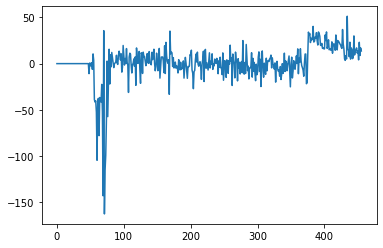

In [68]:
plt.plot(error[5])

In [330]:
error = np.nan_to_num(implicit)+np.nan_to_num(explicit)+rot
target = np.nan_to_num(explicit) / np.max(np.nan_to_num(explicit))
error = error / 45 
target = target[:,56:-80]
error = error[:,56:-80]

In [331]:
np.random.shuffle(target)
np.random.shuffle(error)
testY = target[45:]
trainY = target[:45]
testX = error[45:]
trainX = error[:45]

In [332]:
trainX.shape

(45, 320)

In [293]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras import regularizers
from tensorflow.keras import initializers

hidden = 10
#target = np.abs(target)
#error = np.abs(error)
#target = np.reshape(target, (target.shape[0], target.shape[1]))
#error = np.reshape(error, (error.shape[0], error.shape[1]))

# create and fit the LSTM network
model = Sequential()
"""
model.add(LSTM(hidden, 
    use_bias=False, 
    kernel_regularizer=regularizers.L1L2(l1=1e-3, l2=1e-2),
    kernel_initializer=initializers.RandomNormal(stddev=0.01)))
"""
model.add(Dense(512, activation='relu'))
model.add(Dense(2048, activation='relu'))
model.add(Dense(target.shape[1], activation = 'sigmoid'))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=45, verbose=2, shuffle = True)

Epoch 1/200
1/1 - 0s - loss: 0.1378 - 361ms/epoch - 361ms/step
Epoch 2/200
1/1 - 0s - loss: 0.1076 - 12ms/epoch - 12ms/step
Epoch 3/200
1/1 - 0s - loss: 0.0765 - 13ms/epoch - 13ms/step
Epoch 4/200
1/1 - 0s - loss: 0.0456 - 14ms/epoch - 14ms/step
Epoch 5/200
1/1 - 0s - loss: 0.0251 - 15ms/epoch - 15ms/step
Epoch 6/200
1/1 - 0s - loss: 0.0194 - 15ms/epoch - 15ms/step
Epoch 7/200
1/1 - 0s - loss: 0.0214 - 15ms/epoch - 15ms/step
Epoch 8/200
1/1 - 0s - loss: 0.0248 - 14ms/epoch - 14ms/step
Epoch 9/200
1/1 - 0s - loss: 0.0274 - 15ms/epoch - 15ms/step
Epoch 10/200
1/1 - 0s - loss: 0.0290 - 14ms/epoch - 14ms/step
Epoch 11/200
1/1 - 0s - loss: 0.0299 - 14ms/epoch - 14ms/step
Epoch 12/200
1/1 - 0s - loss: 0.0303 - 16ms/epoch - 16ms/step
Epoch 13/200
1/1 - 0s - loss: 0.0304 - 14ms/epoch - 14ms/step
Epoch 14/200
1/1 - 0s - loss: 0.0301 - 14ms/epoch - 14ms/step
Epoch 15/200
1/1 - 0s - loss: 0.0296 - 14ms/epoch - 14ms/step
Epoch 16/200
1/1 - 0s - loss: 0.0288 - 15ms/epoch - 15ms/step
Epoch 17/200
1/

Epoch 133/200
1/1 - 0s - loss: 0.0035 - 16ms/epoch - 16ms/step
Epoch 134/200
1/1 - 0s - loss: 0.0035 - 14ms/epoch - 14ms/step
Epoch 135/200
1/1 - 0s - loss: 0.0035 - 15ms/epoch - 15ms/step
Epoch 136/200
1/1 - 0s - loss: 0.0035 - 15ms/epoch - 15ms/step
Epoch 137/200
1/1 - 0s - loss: 0.0035 - 16ms/epoch - 16ms/step
Epoch 138/200
1/1 - 0s - loss: 0.0035 - 15ms/epoch - 15ms/step
Epoch 139/200
1/1 - 0s - loss: 0.0035 - 14ms/epoch - 14ms/step
Epoch 140/200
1/1 - 0s - loss: 0.0035 - 14ms/epoch - 14ms/step
Epoch 141/200
1/1 - 0s - loss: 0.0035 - 16ms/epoch - 16ms/step
Epoch 142/200
1/1 - 0s - loss: 0.0034 - 14ms/epoch - 14ms/step
Epoch 143/200
1/1 - 0s - loss: 0.0034 - 15ms/epoch - 15ms/step
Epoch 144/200
1/1 - 0s - loss: 0.0034 - 14ms/epoch - 14ms/step
Epoch 145/200
1/1 - 0s - loss: 0.0034 - 14ms/epoch - 14ms/step
Epoch 146/200
1/1 - 0s - loss: 0.0034 - 15ms/epoch - 15ms/step
Epoch 147/200
1/1 - 0s - loss: 0.0034 - 15ms/epoch - 15ms/step
Epoch 148/200
1/1 - 0s - loss: 0.0034 - 17ms/epoch - 17

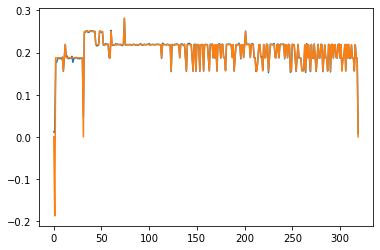

In [303]:
predict_linear = model.predict(trainX)
plt.plot(predict_linear[6])
plt.plot(trainY[6])

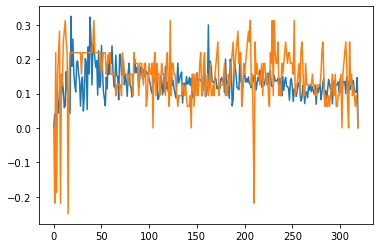

In [301]:
predict_linear = model.predict(testX)
plt.plot(predict_linear[7])
plt.plot(testY[7])

In [333]:
timestep=10
x_train=[]
y_train=[]
x_test=[]
y_test=[]
for j in range(len(trainX)):
    for i in range(timestep,trainX.shape[1]):
        x_train.append(trainX[j,i-timestep:i])
        y_train.append(trainX[j,i])
for j in range(len(testX)):
    for i in range(timestep,testX.shape[1]):
        x_test.append(testX[j,i-timestep:i])
        y_test.append(testX[j,i])

x_train,y_train=np.array(x_train),np.array(y_train)
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1) #reshaped for RNN
x_test,y_test=np.array(x_test),np.array(y_test)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1) #reshaped for RNN
print("x-train-shape= ",x_train.shape)
print("y-train-shape= ",y_train.shape)
print("x-test-shape= ",x_test.shape)
print("y-test-shape= ",y_test.shape)

x-train-shape=  (13950, 10, 1)
y-train-shape=  (13950,)
x-test-shape=  (3100, 10, 1)
y-test-shape=  (3100,)


In [ ]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras import regularizers
from tensorflow.keras import initializers

# create and fit the LSTM network
reg=Sequential()
reg.add(LSTM(128,return_sequences=True,input_shape=(x_train.shape[1],1)))
reg.add(Dropout(0.15))
reg.add(LSTM(256,return_sequences=True))
reg.add(Dropout(0.15))
reg.add(LSTM(512,return_sequences=True))
reg.add(Dropout(0.25))
reg.add(Flatten())
reg.add(Dense(1))

reg.compile(optimizer="adam",loss="mean_squared_error")
reg.fit(x_train,y_train,epochs=100,batch_size=256)

Epoch 1/100
55/55 [==============================] - 107s 2s/step - loss: 0.1286
Epoch 2/100
55/55 [==============================] - 100s 2s/step - loss: 0.1245
Epoch 3/100
55/55 [==============================] - 100s 2s/step - loss: 0.1232
Epoch 4/100
55/55 [==============================] - 103s 2s/step - loss: 0.1218
Epoch 5/100
55/55 [==============================] - 105s 2s/step - loss: 0.1231
Epoch 6/100
55/55 [==============================] - 110s 2s/step - loss: 0.1226
Epoch 7/100
55/55 [==============================] - 108s 2s/step - loss: 0.1205
Epoch 8/100
55/55 [==============================] - 104s 2s/step - loss: 0.1210
Epoch 9/100
55/55 [==============================] - 109s 2s/step - loss: 0.1219
Epoch 10/100
55/55 [==============================] - 101s 2s/step - loss: 0.1209
Epoch 11/100
55/55 [==============================] - 103s 2s/step - loss: 0.1209
Epoch 12/100
55/55 [==============================] - 103s 2s/step - loss: 0.1207
Epoch 13/100
55/55 [=====

In [304]:
predict = reg.predict(x_test)
predict2 = reg.predict(x_train)

In [315]:
result = []
for i in range(10):
    result.append(predict[i*(320-timestep): (i+1)*(320-timestep)])
result2 = []
for i in range(45):
    result2.append(predict2[i*(320-timestep): (i+1)*(320-timestep)])

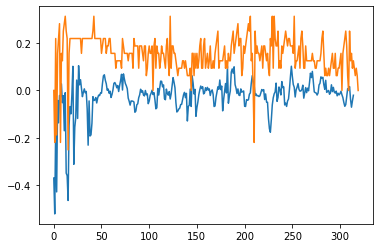

In [322]:
plt.plot(result[7])
plt.plot(testY[7])

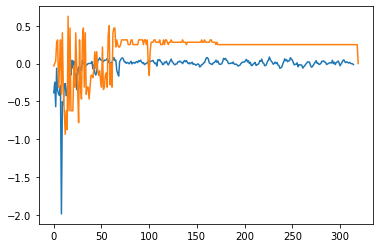

In [323]:
plt.plot(result2[28])
plt.plot(trainY[28])

In [251]:
testY.shape

(10, 240)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

model = nn.RNN(10, 20, 2)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
## Choose the appropriate loss function
loss_fn = torch.nn.MSELoss()
## Cache for Loss Values
losses = []
## Training Loop
for epoch in range(100):
    total_loss = .0
    model.train()
    for batch, (context, target) in enumerate(get_cbow_batches(train_data, batch_size)):
        if gpu_avail:
            context = context.cuda()
            target = target.cuda()
        predict = model(context)
        loss = loss_fn(predict, torch.flatten(target))
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        if print_every is not None and (batch + 1) % print_every == 0:
            print("Epoch {} || batch {} || Loss: {:.4f}".format(epoch+1, batch+1, total_loss / (batch+1)))

    model.eval()
    ## Compute Loss on Test and Training Data
    train_loss = total_loss / (batch+1) 
    test_loss = .0
    for batch, (context, target) in enumerate(get_cbow_batches(test_data, batch_size)):
        if gpu_avail:
            context = context.cuda()
            target = target.cuda()
        predict = model(context)

        loss = loss_fn(predict, torch.flatten(target))
        test_loss += loss.item()
    test_loss = test_loss / (batch+1)
    print("Epoch {}/{} || Train Loss: {:.4f} || Test Loss: {:.4f}".format(epoch+1, n_epoch, train_loss, test_loss))
    losses.append(train_loss)
    test_losses.append(test_loss)
print("Training Complete.")
return model, losses, test_losses

In [36]:
from os.path import dirname, join as pjoin
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

mat = sio.loadmat("OnlineNoReportData.mat")

In [2]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Wed May 29 10:48:40 2013',
 '__version__': '1.0',
 '__globals__': [],
 'data': array([[(array([[[  12.66648698,   12.68140602,   12.69797301, ...,
                            nan,           nan,           nan],
                 [  25.53014398,   25.54754901,   25.5647881 , ...,
                            nan,           nan,           nan],
                 [  33.76314116,   33.78072596,   33.79659605, ...,
                            nan,           nan,           nan],
                 ...,
                 [1155.83608484, 1155.85328984, 1155.86920381, ...,
                            nan,           nan,           nan],
                 [1160.55282187, 1160.56951785, 1160.58592296, ...,
                            nan,           nan,           nan],
                 [1165.3871839 , 1165.40206385, 1165.41967583, ...,
                            nan,           nan,           nan]],
 
                [[  24.1583848 ,   2

In [136]:
x = mat["data"]["cursor_x"][0][0]
y = mat["data"]["cursor_y"][0][0]
target_dist = mat["data"]["target_dist"][0][0]
target_angle = mat["data"]["target_angle"][0][0]
hand_angle = mat["data"]["hand_angle"][0][0]
rotation = mat["data"]["rotation"][0][0]
hand_r = mat["data"]["hand_r"][0][0]
hand_x = mat["data"]["hand_x"][0][0]
hand_y = mat["data"]["hand_y"][0][0]
target_x = mat["data"]["target_x"][0][0]
target_y = mat["data"]["target_y"][0][0]

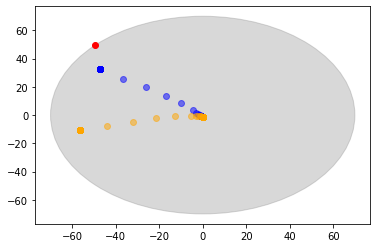

In [152]:
circle1 = plt.Circle((0, 0),70, color='gray', alpha = 0.3)
plt.gca().add_patch(circle1)
plt.scatter(x[1,60,:],y[1,60,:],color="blue",alpha = 0.5)
plt.scatter(hand_x[1,60,:],hand_y[1,60,:],color = "orange",alpha = 0.5)
plt.scatter(target_x[1,60],target_y[1,60],color = "red",alpha = 1)

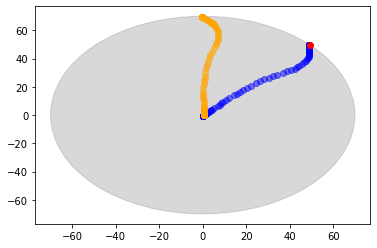

In [150]:
circle1 = plt.Circle((0, 0),70, color='gray', alpha = 0.3)
plt.gca().add_patch(circle1)
plt.scatter(x[1,90,:],y[1,90,:],color="blue",alpha = 0.5)
plt.scatter(hand_x[1,90,:],hand_y[1,90,:],color = "orange",alpha = 0.5)
plt.scatter(target_x[1,90],target_y[1,90],color = "red",alpha = 1)

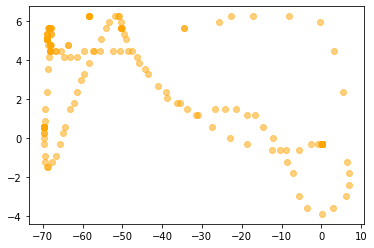

In [146]:
plt.scatter(hand_x[1,100,:],hand_y[1,100,:],color = "orange",alpha = 0.5)

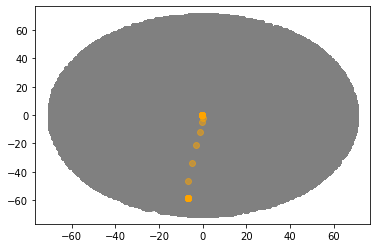

In [50]:
plt.scatter(x[:,:,:],y[:,:,:],color="gray",alpha = 0.5)
plt.scatter(hand_x[1,1,:],hand_y[1,1,:],color = "orange",alpha = 0.5)

In [48]:
hand_x[1,1]

array([-0.297657, -0.297657, -0.297657, -0.297657, -0.297657, -0.297657,
       -0.297657, -0.297657, -0.297657, -0.297657, -0.297657, -0.297657,
       -0.297657, -0.297657, -0.297657, -0.297657, -0.297657, -0.297657,
       -0.297657, -0.297657, -0.297657, -0.297657, -0.297657, -0.297657,
       -0.297657, -0.297657, -0.297657, -0.297657, -0.297657, -0.297657,
        0.      , -0.297657, -1.190628, -2.97657 , -5.060169, -6.548454,
       -6.548454, -6.548454, -6.548454, -6.548454, -6.548454, -6.548454,
       -6.548454, -6.548454, -6.548454, -6.548454, -6.548454, -6.548454,
       -6.548454, -6.548454, -6.548454, -6.548454, -6.548454, -6.548454,
       -6.548454, -6.548454, -6.548454, -6.548454, -6.548454, -6.548454,
       -6.548454, -6.548454, -6.548454, -6.548454, -6.548454, -6.548454,
       -6.548454, -6.548454, -6.548454, -6.548454, -6.548454, -6.548454,
       -6.548454, -6.548454, -6.548454, -6.548454, -6.548454, -6.548454,
       -6.548454, -6.548454, -6.548454, -6.548454, 

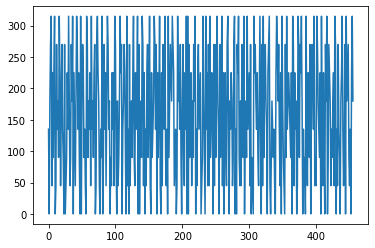

In [39]:
plt.plot(target_angle[0])

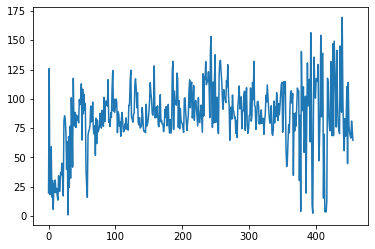

In [44]:
plt.plot(hand_r[0])

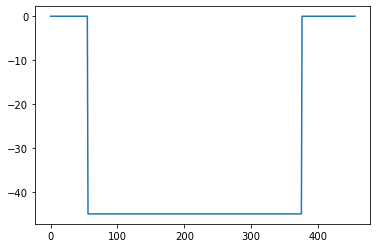

In [42]:
plt.plot(rotation[0])

In [53]:
hand_angle.shape

(15, 456)